In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report


In [1]:
from google.colab import files


uploaded = files.upload()

Saving air_quality_health_impact_data.csv to air_quality_health_impact_data.csv


In [10]:
df = pd.read_csv('air_quality_health_impact_data.csv')
df

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,5807,171.112762,11.246387,197.984628,158.643107,17.743678,280.370909,37.359323,61.707640,4.097129,14,5,2,100.000000,4.0
5807,5808,490.691667,275.340762,55.774170,132.336871,29.334724,108.043492,34.532542,21.528555,6.682549,8,6,2,100.000000,3.0
5808,5809,314.841798,41.892699,184.708551,82.105823,68.334578,105.568503,22.975564,92.725625,2.889698,12,2,3,100.000000,1.0
5809,5810,208.080473,165.533785,199.177255,100.796385,87.586488,166.469537,36.090620,25.836286,10.722393,6,2,3,100.000000,4.0


In [11]:
df.isna().sum()
# To check for missing data

,0
RecordID,0
AQI,0
PM10,0
PM2_5,0
NO2,0
SO2,0
O3,0
Temperature,0
Humidity,0
WindSpeed,0


In [12]:
df.drop(columns='RecordID', inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811 entries, 0 to 5810
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AQI                  5811 non-null   float64
 1   PM10                 5811 non-null   float64
 2   PM2_5                5811 non-null   float64
 3   NO2                  5811 non-null   float64
 4   SO2                  5811 non-null   float64
 5   O3                   5811 non-null   float64
 6   Temperature          5811 non-null   float64
 7   Humidity             5811 non-null   float64
 8   WindSpeed            5811 non-null   float64
 9   RespiratoryCases     5811 non-null   int64  
 10  CardiovascularCases  5811 non-null   int64  
 11  HospitalAdmissions   5811 non-null   int64  
 12  HealthImpactScore    5811 non-null   float64
 13  HealthImpactClass    5811 non-null   float64
dtypes: float64(11), int64(3)
memory usage: 635.7 KB


In [7]:
X = df.drop(columns='HealthImpactScore')
y = df['HealthImpactScore']

In [15]:
# Define proportions
train_frac = 0.8
val_frac = 0.1
test_frac = 0.1

train_data, temp_data = train_test_split(df, test_size=(1 - train_frac), shuffle=False)
val_data, test_data = train_test_split(temp_data, test_size=(test_frac / (val_frac + test_frac)), shuffle=False)

print(f"Training set: {len(train_data)} samples")
print(f"Validation set: {len(val_data)} samples")
print(f"Test set: {len(test_data)} samples")


Training set: 4648 samples
Validation set: 581 samples
Test set: 582 samples


In [16]:
train_data.describe()

,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
count,4648.000000,4648.000000,4648.000000,4648.000000,4648.000000,4648.000000,4648.000000,4648.000000,4648.000000,4648.000000,4648.000000,4648.000000,4648.000000,4648.000000
mean,248.577197,147.611632,99.556330,101.903275,49.703336,149.743135,14.905413,54.900436,9.943254,10.009897,5.001506,2.007100,93.685829,0.195998
std,144.678446,85.651474,58.498727,57.858536,28.705482,86.800459,14.425162,26.009639,5.775769,3.143698,2.220422,1.400357,13.460841,0.527375
min,0.005817,0.015848,0.031549,0.009625,0.011023,0.020249,-9.990998,10.001506,0.002094,1.000000,0.000000,0.000000,22.448488,0.000000
25%,122.861830,74.073274,48.082979,53.047649,24.967541,73.846387,2.416819,32.145366,4.897076,8.000000,3.000000,1.000000,97.889673,0.000000
50%,250.758564,146.464076,98.310465,102.407931,49.901546,150.363947,15.011339,54.396875,9.943985,10.000000,5.000000,2.000000,100.000000,0.000000
75%,373.319060,220.698448,151.700588,150.939609,73.747913,224.675513,27.327849,77.853796,14.936879,12.000000,6.000000,3.000000,100.000000,0.000000
max,499.858837,299.851557,199.984965,199.980195,99.969561,299.919625,39.963434,99.997493,19.999139,23.000000,14.000000,12.000000,100.000000,3.000000


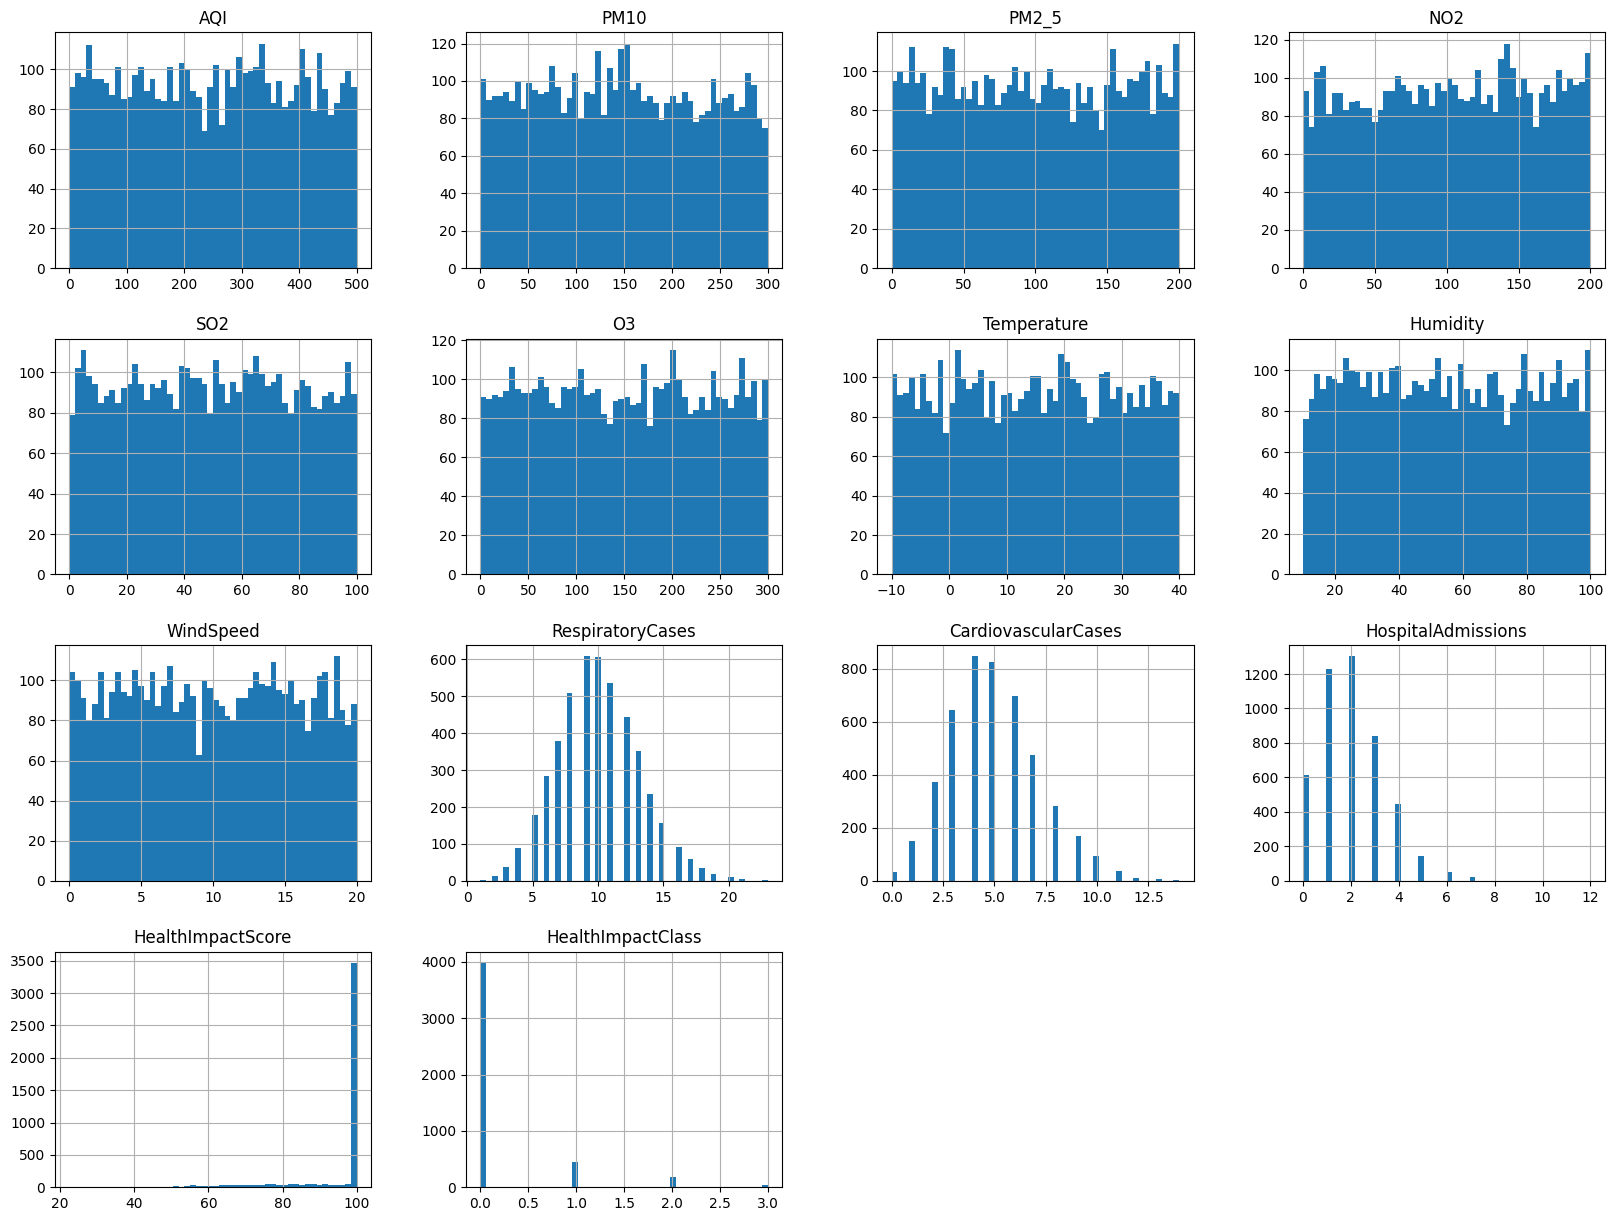

In [20]:
train_data.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [23]:
def feature_engeneering(df):
    global X
    global y
    X = df[['AQI','PM10','PM2_5','NO2','SO2','O3','Temperature','Humidity','WindSpeed']]
    y = df['HealthImpactClass']

    return X, y

In [24]:
X_train, y_train = feature_engeneering(train_data)
X_test, y_test = feature_engeneering(test_data)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.5756013745704467
              precision    recall  f1-score   support

         0.0       0.59      0.97      0.73       316
         1.0       0.43      0.27      0.33        79
         2.0       0.44      0.11      0.18        72
         3.0       1.00      0.02      0.03        59
         4.0       0.00      0.00      0.00        56

    accuracy                           0.58       582
   macro avg       0.49      0.27      0.25       582
weighted avg       0.54      0.58      0.47       582



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
forest.fit(X_train, y_train)

y_pred_forest = forest.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))

Accuracy: 0.563573883161512
              precision    recall  f1-score   support

         0.0       0.58      0.98      0.73       316
         1.0       0.41      0.23      0.29        79
         2.0       0.00      0.00      0.00        72
         3.0       0.00      0.00      0.00        59
         4.0       0.00      0.00      0.00        56

    accuracy                           0.56       582
   macro avg       0.20      0.24      0.20       582
weighted avg       0.37      0.56      0.44       582



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Accuracy: 0.5567010309278351
              precision    recall  f1-score   support

         0.0       0.59      0.94      0.72       316
         1.0       0.36      0.25      0.30        79
         2.0       0.29      0.07      0.11        72
         3.0       0.50      0.02      0.03        59
         4.0       0.00      0.00      0.00        56

    accuracy                           0.56       582
   macro avg       0.35      0.26      0.23       582
weighted avg       0.45      0.56      0.45       582



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [31]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)
svm_y_pred = svm_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, svm_y_pred))
print(classification_report(y_test, svm_y_pred))

Accuracy: 0.6030927835051546
              precision    recall  f1-score   support

         0.0       0.61      0.97      0.75       316
         1.0       0.56      0.37      0.44        79
         2.0       0.53      0.14      0.22        72
         3.0       1.00      0.07      0.13        59
         4.0       0.00      0.00      0.00        56

    accuracy                           0.60       582
   macro avg       0.54      0.31      0.31       582
weighted avg       0.57      0.60      0.51       582



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
